In [4]:
from mpe2 import simple_spread_v3
from pettingzoo.utils.conversions import aec_to_parallel
from failure_api.communication_models.markov_model import BaseMarkovModel
from failure_api.wrappers.communication_wrapper import CommunicationWrapper

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


env = simple_spread_v3.env(N=3, local_ratio=0.5)
agent_ids = env.possible_agents
model = BaseMarkovModel(agent_ids)

wrapped_env = CommunicationWrapper(env, failure_models=[model])
par_env = aec_to_parallel(wrapped_env)
observations, infos = par_env.reset()

communication_matrices = [wrapped_env.get_communication_state().astype(int).copy()]
rewards_over_time = []

for t in range(10):
    actions = {agent: par_env.action_space(agent).sample() for agent in par_env.agents}
    observations, rewards, terminations, truncations, infos = par_env.step(actions)
    
    
    matrix = wrapped_env.get_communication_state().astype(int).copy()
    communication_matrices.append(matrix)
    rewards_over_time.append(rewards)

    print(f"\nStep {t}: Communication Matrix")
    print(matrix)
    


Step 0: Communication Matrix
[[1 1 0]
 [1 1 0]
 [1 0 1]]

Step 1: Communication Matrix
[[1 1 0]
 [0 1 0]
 [1 1 1]]

Step 2: Communication Matrix
[[1 1 0]
 [1 1 1]
 [1 0 1]]

Step 3: Communication Matrix
[[1 0 0]
 [1 1 0]
 [1 0 1]]

Step 4: Communication Matrix
[[1 1 1]
 [0 1 0]
 [1 1 1]]

Step 5: Communication Matrix
[[1 1 1]
 [1 1 0]
 [1 1 1]]

Step 6: Communication Matrix
[[1 1 1]
 [1 1 0]
 [1 1 1]]

Step 7: Communication Matrix
[[1 0 0]
 [0 1 0]
 [1 0 1]]

Step 8: Communication Matrix
[[1 0 0]
 [1 1 0]
 [0 0 1]]

Step 9: Communication Matrix
[[1 0 1]
 [0 1 1]
 [0 1 1]]


In [5]:
def plot_comm_matrix(matrix, step):
    plt.figure(figsize=(4, 3))
    sns.heatmap(matrix, annot=True, cmap="YlGnBu", cbar=False, square=True,
                xticklabels=[f"A{i}" for i in range(matrix.shape[0])],
                yticklabels=[f"A{i}" for i in range(matrix.shape[0])])
    plt.title(f"Step {step} Communication Matrix")
    plt.xlabel("Receiver")
    plt.ylabel("Sender")
    plt.tight_layout()
    plt.show()

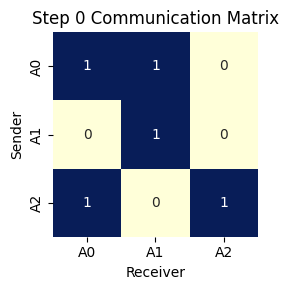

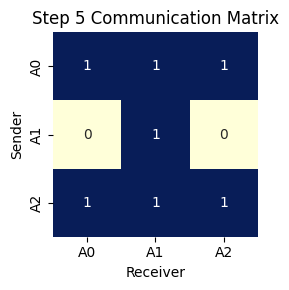

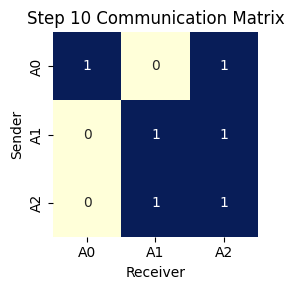

In [6]:
plot_comm_matrix(communication_matrices[0], step=0)
plot_comm_matrix(communication_matrices[5], step=5)
plot_comm_matrix(communication_matrices[10], step=10)

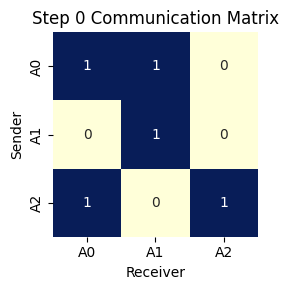

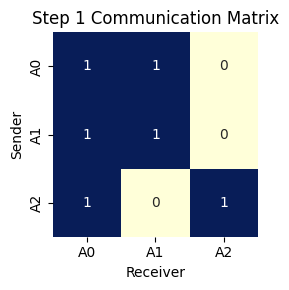

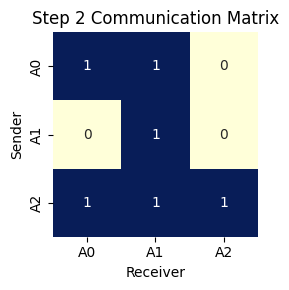

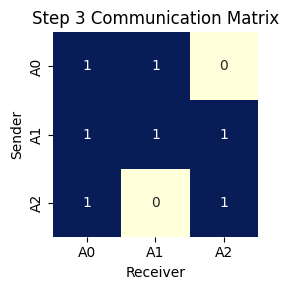

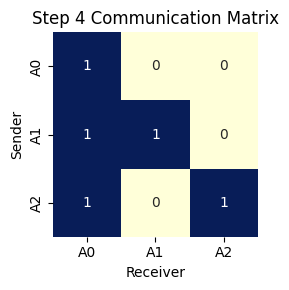

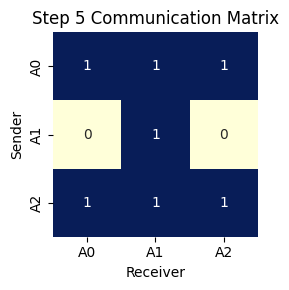

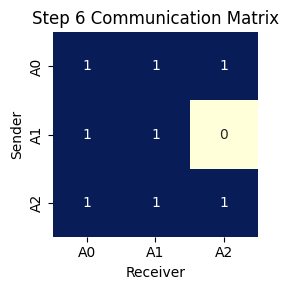

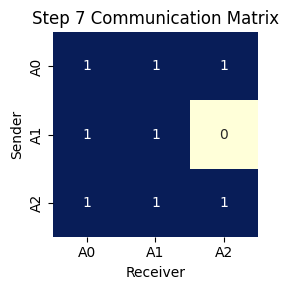

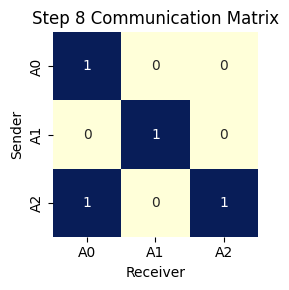

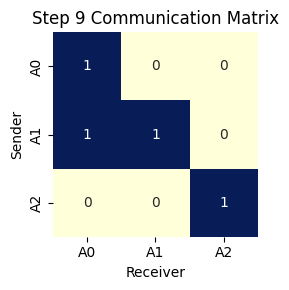

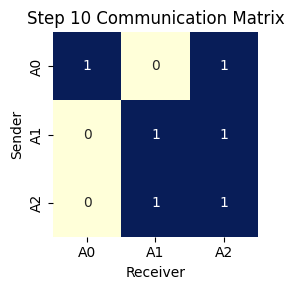

In [7]:
for i, matrix in enumerate(communication_matrices):
    plot_comm_matrix(matrix, step=i)